DataFrame cargado exitosamente desde: /content/resultados_filtrados.csv
¡ADVERTENCIA! El archivo '/content/resultados_filtrados.csv' no contiene las columnas esperadas: 'Luz_Cantidad' y/o 'Biomasa'.
Creando un DataFrame de EJEMPLO para que el código pueda ejecutarse.


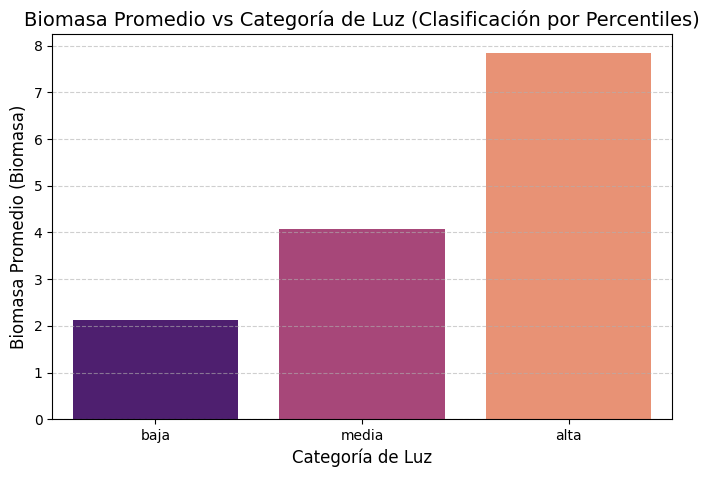


--- RESUMEN ---
✔ Columna 'indice_luz' agregada.
✔ Columna 'categoria_luz' agregada (Percentiles: P33=149.10, P66=297.00).
✔ Gráfico de barras generado y mostrado.
✔ DataFrame final guardado en: /content/resultado_reto2_santiago_final.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


archivo_input = '/content/resultados_filtrados.csv'


COL_LUZ = 'Luz_Cantidad'
COL_BIOMASA = 'Biomasa'


use_example_data = False

df = None

try:
    df_loaded = pd.read_csv(archivo_input)
    print(f"DataFrame cargado exitosamente desde: {archivo_input}")


    if COL_LUZ not in df_loaded.columns or COL_BIOMASA not in df_loaded.columns:
        print(f"¡ADVERTENCIA! El archivo '{archivo_input}' no contiene las columnas esperadas: '{COL_LUZ}' y/o '{COL_BIOMASA}'.")
        use_example_data = True
    else:
        df = df_loaded

except FileNotFoundError:
    print(f"¡ADVERTENCIA! No se encontró el archivo en la ruta: {archivo_input}")
    use_example_data = True

if use_example_data:
    print("Creando un DataFrame de EJEMPLO para que el código pueda ejecutarse.")
    data = {
        'Sitio': [f'S{i+1}' for i in range(10)],
        COL_LUZ: [100, 250, 50, 400, 300, 150, 450, 200, 350, 120],
        COL_BIOMASA: [2.5, 5.2, 1.1, 8.5, 6.1, 3.0, 9.5, 4.0, 7.3, 2.8]
    }
    df = pd.DataFrame(data)


def indice_luz(df):
    """Calcula el índice de luz (Luz_Sitio / Luz_Máxima)."""
    luz_maxima = df[COL_LUZ].max()
    df['indice_luz'] = df[COL_LUZ] / luz_maxima
    return df

df = indice_luz(df.copy())

p33 = df[COL_LUZ].quantile(0.33)
p66 = df[COL_LUZ].quantile(0.66)

def clasificar_luz(valor, p33, p66):
    """Clasifica el valor de luz en 'baja', 'media' o 'alta'."""
    if valor <= p33:
        return 'baja'
    elif valor <= p66:
        return 'media'
    else:
        return 'alta'


df['categoria_luz'] = df[COL_LUZ].apply(lambda x: clasificar_luz(x, p33, p66))


biomasa_promedio = df.groupby('categoria_luz')[COL_BIOMASA].mean().reset_index()


orden_categorias = ['baja', 'media', 'alta']
biomasa_promedio['categoria_luz'] = pd.Categorical(
    biomasa_promedio['categoria_luz'],
    categories=orden_categorias,
    ordered=True
)
biomasa_promedio = biomasa_promedio.sort_values('categoria_luz')


plt.figure(figsize=(8, 5))
sns.barplot(
    x='categoria_luz',
    y=COL_BIOMASA,
    data=biomasa_promedio,
    palette='magma',
    order=orden_categorias,
    hue='categoria_luz',
    legend=False
)
plt.title('Biomasa Promedio vs Categoría de Luz (Clasificación por Percentiles)', fontsize=14)
plt.xlabel('Categoría de Luz', fontsize=12)
plt.ylabel(f'Biomasa Promedio ({COL_BIOMASA})', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



nombre_archivo_salida = 'resultado_reto2_santiago_final.csv'
df.to_csv(nombre_archivo_salida, index=False)

print("\n--- RESUMEN ---")
print(f"✔ Columna 'indice_luz' agregada.")
print(f"✔ Columna 'categoria_luz' agregada (Percentiles: P33={p33:.2f}, P66={p66:.2f}).")
print("✔ Gráfico de barras generado y mostrado.")
print(f"✔ DataFrame final guardado en: {os.path.abspath(nombre_archivo_salida)}")